In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
keras.__version__

'2.3.1'

In [2]:
#Reading the Dataset
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
#Dropping the unimportant columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [6]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

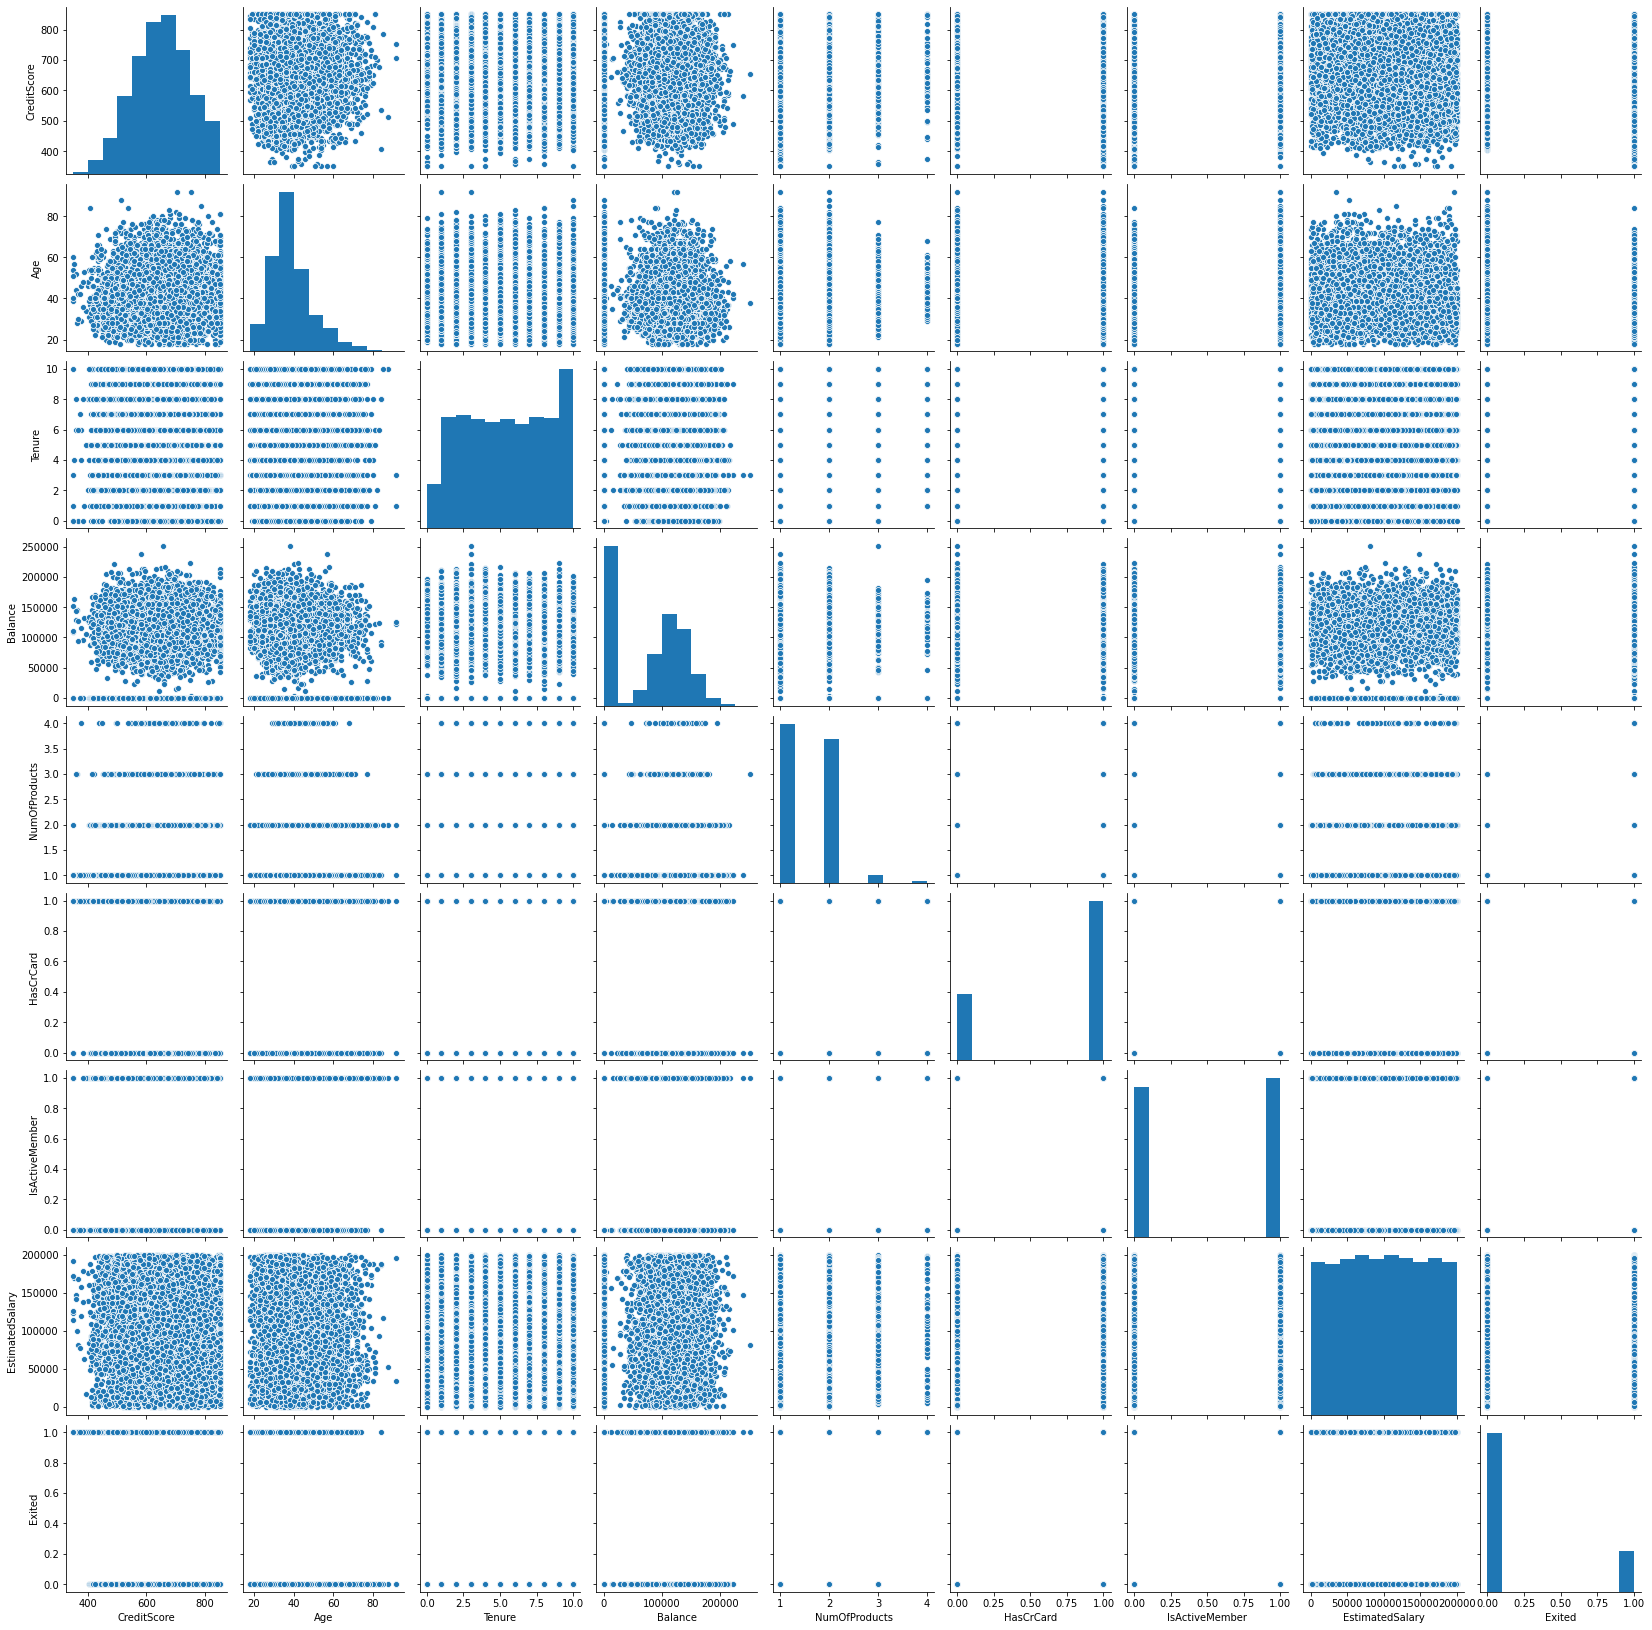

In [7]:
sns.pairplot(df)

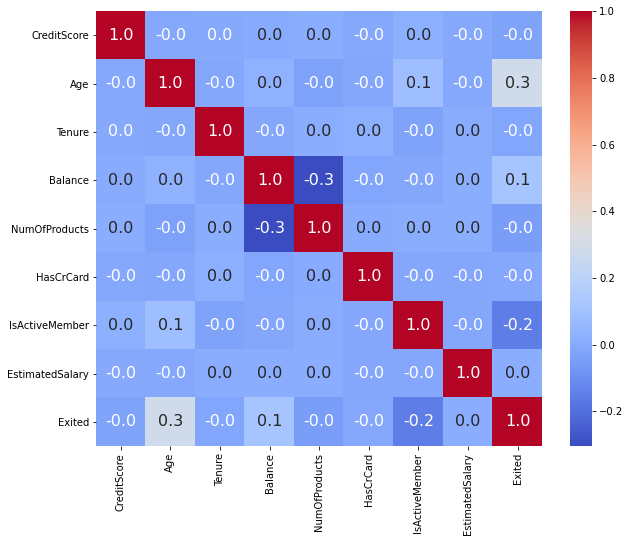

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".1f",annot_kws={'size':16})

In [9]:
print(df['Geography'].unique())
print(df['Gender'].unique())
print(df['NumOfProducts'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
[1 3 2 4]


In [10]:
#Converting the Categorical variables into Numerical variables
df = pd.get_dummies(df, drop_first=True)

In [11]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [12]:
#Checking if there's any null values
df.isnull().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64

In [13]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.250900,0.247700,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.433553,0.431698,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,0.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


In [14]:
#Splitting the Dataset into Dependent and Independent variables
X = df.drop('Exited', axis=1)
y = df['Exited']

In [15]:
print(X.shape)
print(y.shape)

(10000, 11)
(10000,)


In [16]:
#Splitting the Dataset into Training and Testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
print(X_train.shape)
print(X_test.shape)

(7000, 11)
(3000, 11)


In [18]:
#Standardizing the Dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Random Forest Classifier

In [19]:
#Importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
y_pred = rfc.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[2311   89]
 [ 318  282]]
0.8643333333333333


In [33]:
import pickle
file = open('Bank_Customer_Churn.pkl', 'wb')
pickle.dump(rfc, file)

## ANN

In [22]:
#Importing the Keras Libraries and Packages
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [23]:
#Initializing the ANN
classifier = Sequential()

In [24]:
#Adding the input layer and first hidden layer
classifier.add(Dense(activation= 'relu', input_dim= 11, units= 6, kernel_initializer= 'uniform'))

#Adding the second hidden layer
classifier.add(Dense(activation= 'relu', units= 6, kernel_initializer= 'uniform'))

#Adding the output layer
classifier.add(Dense(activation= 'sigmoid', units= 1, kernel_initializer= 'uniform'))

In [25]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [26]:
#Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
#Fitting the ANN to Training set
classifier.fit(X_train, y_train, batch_size=10, epochs=50)

Epoch 1/50
7000/7000 [==============================] - 4s 546us/step - loss: 0.4110 - accuracy: 0.8316
Epoch 2/50
7000/7000 [==============================] - 4s 518us/step - loss: 0.4098 - accuracy: 0.8351
Epoch 3/50
7000/7000 [==============================] - 4s 522us/step - loss: 0.4085 - accuracy: 0.8350
Epoch 4/50
7000/7000 [==============================] - 4s 521us/step - loss: 0.4077 - accuracy: 0.8354
Epoch 5/50
7000/7000 [==============================] - 4s 538us/step - loss: 0.4072 - accuracy: 0.8340
Epoch 6/50
7000/7000 [==============================] - 4s 524us/step - loss: 0.4070 - accuracy: 0.8367
Epoch 7/50
7000/7000 [==============================] - 4s 518us/step - loss: 0.4062 - accuracy: 0.8356
Epoch 8/50
7000/7000 [==============================] - 4s 524us/step - loss: 0.4057 - accuracy: 0.8353
Epoch 9/50
7000/7000 [==============================] - 4s 552us/step - loss: 0.4059 - accuracy: 0.8363
Epoch 10/50
7000/7000 [==============================] - 4s 526u

In [29]:
#Predicting the Test set
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [30]:
#Confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(cm)
print(accuracy)

[[2291  109]
 [ 393  207]]
0.8326666666666667
